In [1]:
import os
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from yolov8_interpretable import InterpretableYOLOTest

In [2]:
data_yaml_path = '/home/alan/Documents/Dataset_1/brain-tumor-detection-dataset/Br35H-Mask-RCNN/data.yaml'
weights_path = '/home/alan/Documents/YOLOV8_interpretable/YOLOv8_weights/best.pt'
target_layer_index = 140

In [3]:
model = InterpretableYOLOTest(data_yaml_path, weights=weights_path, target_layer_index=target_layer_index)

Collected features for 500 samples from layer at index '140'.
Overall correlation score for the target layer: 0.05787736290354306
complete


In [4]:
def draw_bounding_box(image, bbox, target_size=(225, 225), original_size=(640, 640), color="red"):
    draw = ImageDraw.Draw(image)
    orig_width, orig_height = original_size
    target_width, target_height = target_size
    
    # YOLO format: [x_center, y_center, width, height]
    x_center, y_center, width, height = bbox
    print(x_center, y_center, width, height)

    x_center *= target_width
    y_center *= target_height
    width *= target_width
    height *= target_height



    x1 = x_center - (width / 2)
    y1 = y_center - (height / 2)
    x2 = x_center + (width / 2)
    y2 = y_center + (height / 2)

    draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
    return image

In [20]:
image_path = '/home/alan/Documents/Dataset_1/brain-tumor-detection-dataset/Br35H-Mask-RCNN/train/images/y0.jpg'
k = 5
result = model.single_image_inference(image_path, k=k)
print(result)

{'model_prediction': 0, 'confidence_score': 0.02714675, 'bounding_box': array([    0.28366,     0.29233,       0.342,     0.33249], dtype=float32), 'nearest_neighbors': ['y315.jpg', 'y154.jpg', 'y0.jpg', 'y317.jpg', 'y432.jpg'], 'distances': array([[ 5.8919e+05,  5.9093e+05,  5.9257e+05,  5.9374e+05,  5.9442e+05]], dtype=float32)}


0.28365752 0.29232615 0.34199566 0.33248982


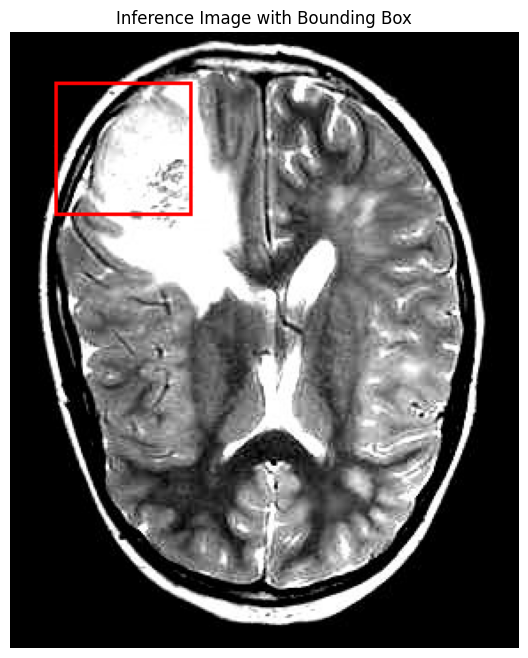

In [21]:
if result['bounding_box'] is not None:
    image = Image.open(image_path)
    inference_image_with_bbox = draw_bounding_box(image, result['bounding_box'])
    
    plt.figure(figsize=(8, 8))
    plt.title("Inference Image with Bounding Box")
    plt.imshow(inference_image_with_bbox)
    plt.axis('off')
    plt.show()

0.29577464788732394 0.6313559322033898 0.29107981220657275 0.2542372881355932


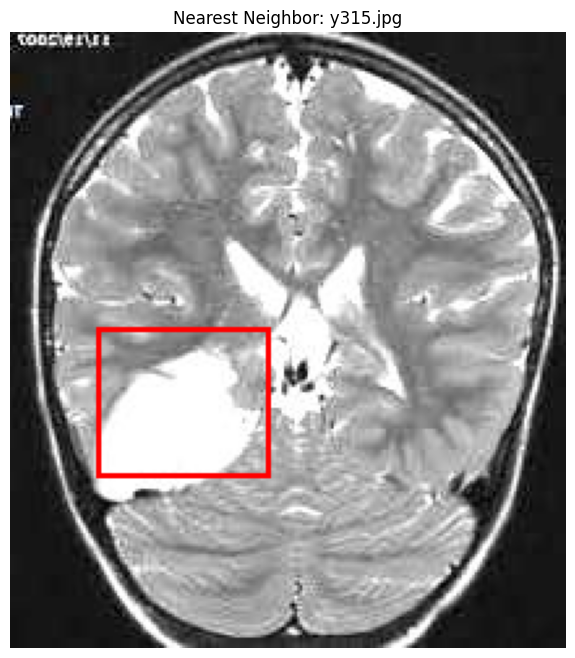

0.5340909090909091 0.7991071428571429 0.3181818181818182 0.23511904761904762


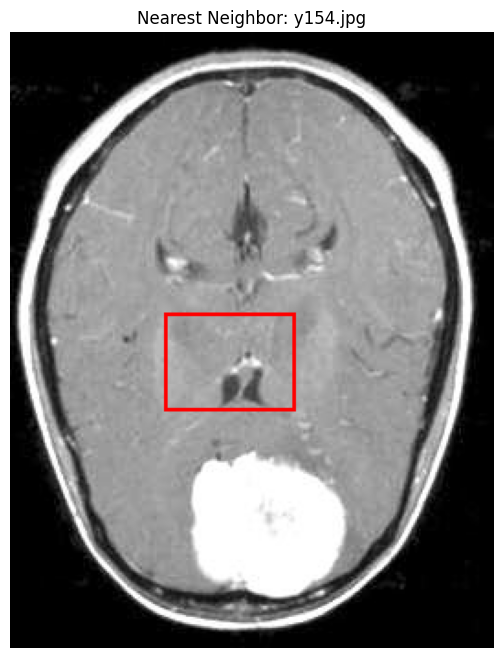

0.3048780487804878 0.27011494252873564 0.2961672473867596 0.39655172413793105


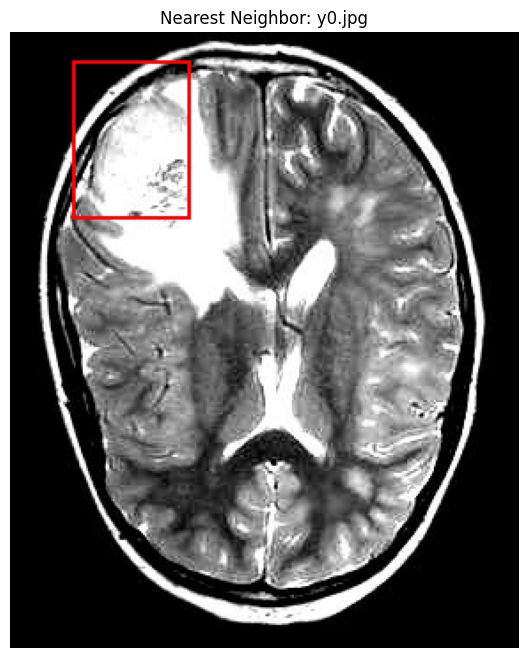

0.5348258706467661 0.41832669322709165 0.17412935323383086 0.1593625498007968


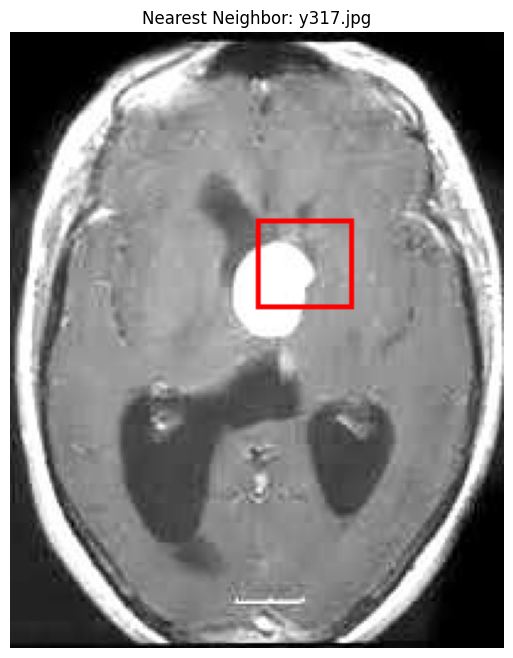

0.404296875 0.630859375 0.19140625 0.20703125


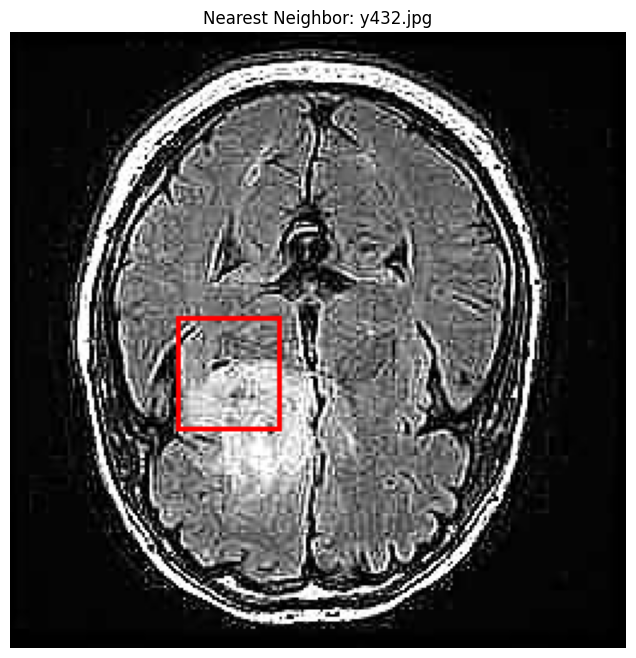

In [22]:
nearest_neighbors = result['nearest_neighbors']

# Function to get the bounding box from the label file
def get_bounding_box_from_label(image_name, label_dir):
    label_path = os.path.join(label_dir, image_name.replace('.jpg', '.txt'))
    with open(label_path, 'r') as file:
        label = file.readline().strip().split()
    class_id, x_center, y_center, width, height = map(float, label)
    return [x_center, y_center, width, height]


label_dir = '/home/alan/Documents/YOLOV8_interpretable/Dataset_1/brain-tumor-detection-dataset/Br35H-Mask-RCNN/train/labels'  # Path to the training labels

for neighbor in nearest_neighbors:
    neighbor_image_path = os.path.join(model.train_loader.dataset.img_dir, neighbor)
    neighbor_image = Image.open(neighbor_image_path)
    neighbor_bbox = get_bounding_box_from_label(neighbor, label_dir)
    neighbor_image_with_bbox = draw_bounding_box(neighbor_image, neighbor_bbox)
    
    plt.figure(figsize=(8, 8))
    plt.title(f"Nearest Neighbor: {neighbor}")
    plt.imshow(neighbor_image_with_bbox)
    plt.axis('off')
    plt.show()